In [191]:
import cv2
import math
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

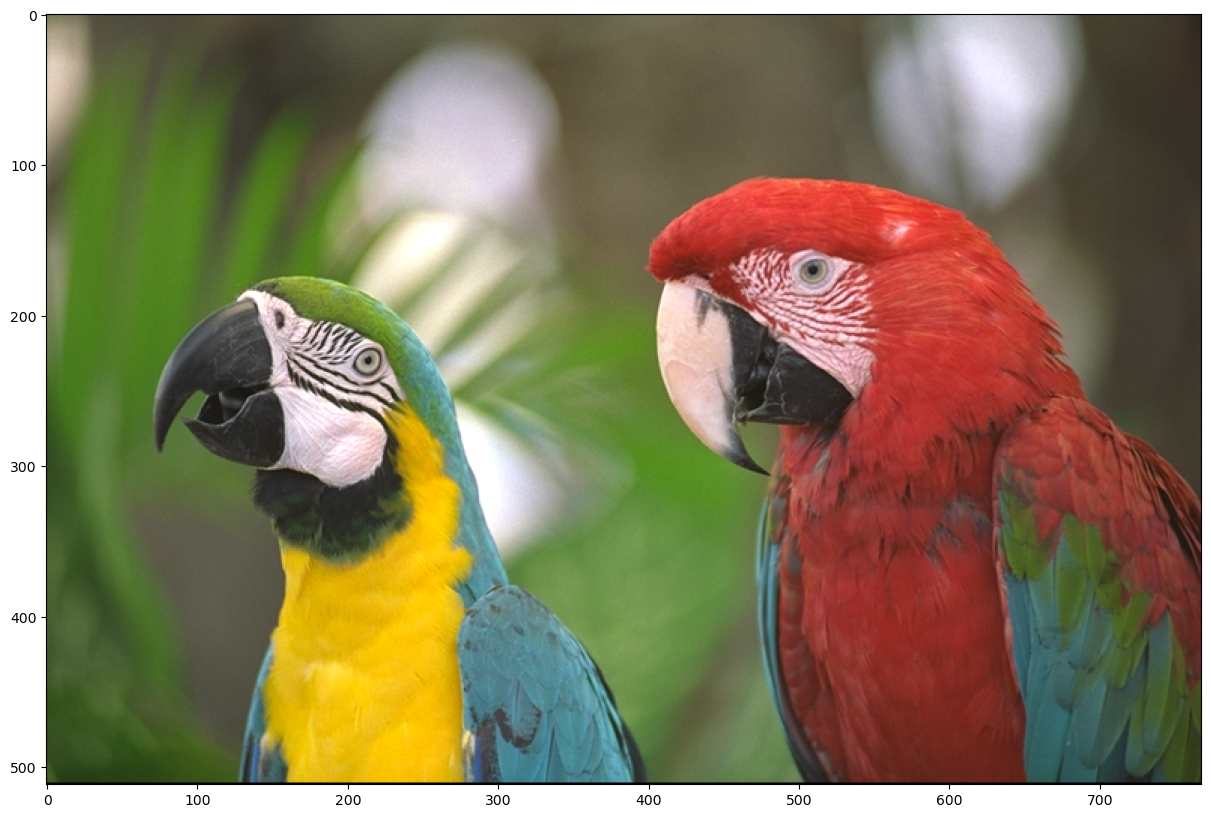

In [192]:
# Load image
img = cv2.imread('kodim23.png')
# Convert it to RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# Plot it
# Cast the image to float
img = img/255.0
plt.imshow(img)

In [193]:
##### Black, dark gray, light gray, white
colors_4 = np.array([[0, 0, 0],
                   [64, 64, 64],
                   [192, 192, 192],
                   [255, 255, 255]])



def find_closest_color(pixel, colors):
    # Calculate the squared Euclidean distance for each color in the palette
    distances_squared = np.sum((colors - pixel) ** 2, axis=1)
          
    # Find the index of the minimum distance
    closest_index = np.argmin(distances_squared)
    
    # Return the closest color from the palette
    return colors[closest_index]
    


In [194]:


def get_quantized_image(img, colors):
    # Prepare for quantization
    rows, cols, channels = img.shape
    quantized = np.zeros_like(img)

    # Apply quantization
    for r in range(rows):
        for c in range(cols):
            # Extract the original pixel value
            pixel = img[r,c,:]
                
            # Find the closest colour from the pallette (using absolute value/Euclidean distance)
            # Note: You may need more than one line of code here
        
            new_pixel = find_closest_color(pixel, colors)
        
            # Apply quantization
            quantized[r, c, :] = new_pixel
    return quantized    



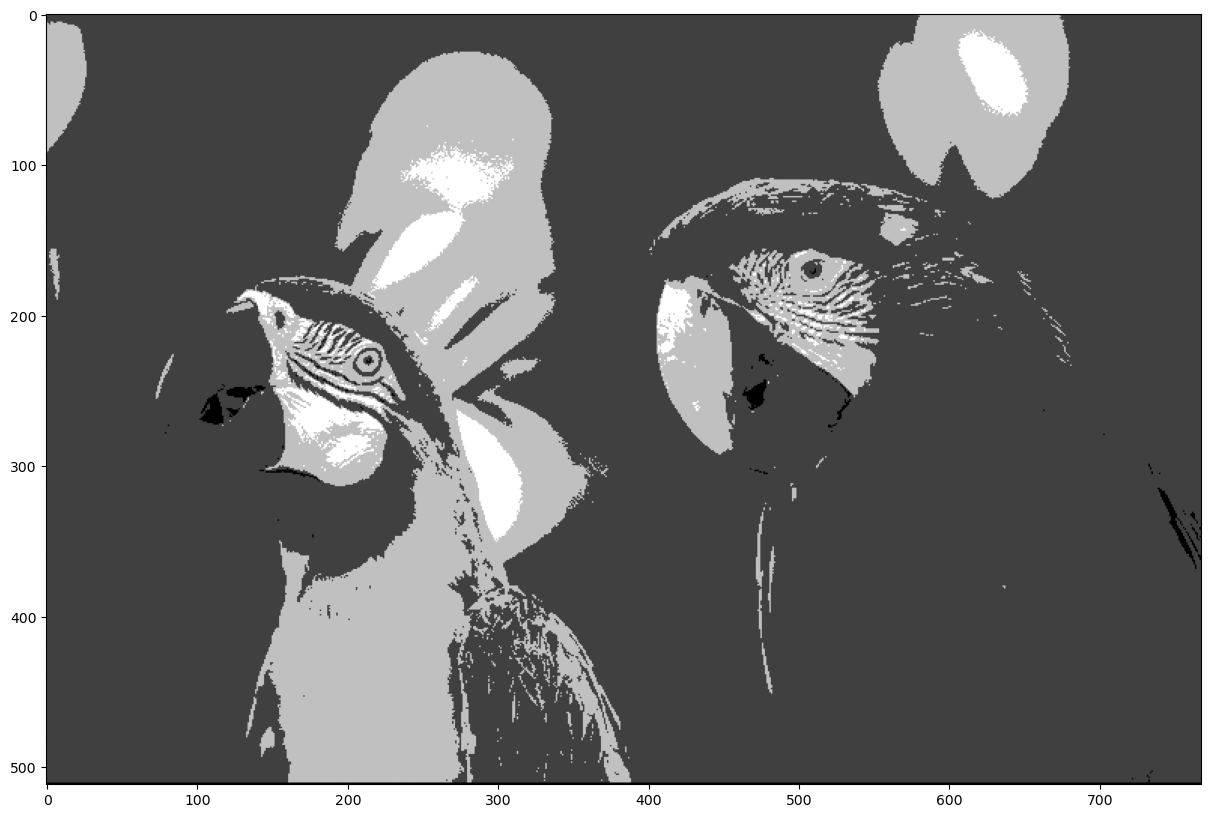

In [195]:

#cast colors palette to float
colors = colors_4/255.0

# Show quantized image (don't forget to cast back to uint8)
quantized = get_quantized_image(img, colors)
plt.imshow(quantized)


In [196]:
# Compute average quantization error
mse = np.mean((img - quantized) ** 2)
if mse != 0:
    psnr = 20 * np.log10(1.0 / np.sqrt(mse))
    print("PSNR for quantized = ",psnr)

PSNR for quantized =  14.826061547883144


In [197]:

def get_dithered_image(img, colors):
    # Make a temporal copy of the original image, we will need it for error diffusion
    img_tmp = np.copy(img)
    dithering = np.zeros_like(img)

    for r in range(1, rows-2):
        for c in range(1, cols-2):
            # Extract the original pixel value
            pixel =  img_tmp[r,c,:]
                             
            # Find the closest colour from the pallette (using absolute value/Euclidean distance)
            # Note: You may need more than one line of code here
        
            new_pixel = find_closest_color(pixel, colors)
           
            # Compute quantization error
            quant_error = pixel - new_pixel
        
            # Diffuse the quantization error accroding to the FS diffusion matrix
            # Note: You may need more than one line of code here

            # Distribute the error to neighboring pixels based on the Floyd-Steinberg weights
            # The weights are 7/16, 3/16, 5/16, and 1/16
                
            # Right pixel 
            img_tmp[r, c + 1] += quant_error * 7 / 16
                
            # Bottom-left pixel 
            img_tmp[r + 1, c - 1] += quant_error * 3 / 16
                
            # Bottom pixel 
            img_tmp[r + 1, c] += quant_error * 5 / 16
                
            # Bottom-right pixel 
            img_tmp[r + 1, c + 1] += quant_error * 1 / 16
        
                
            # Apply dithering
            dithering[r, c, :] = new_pixel
    return  dithering          

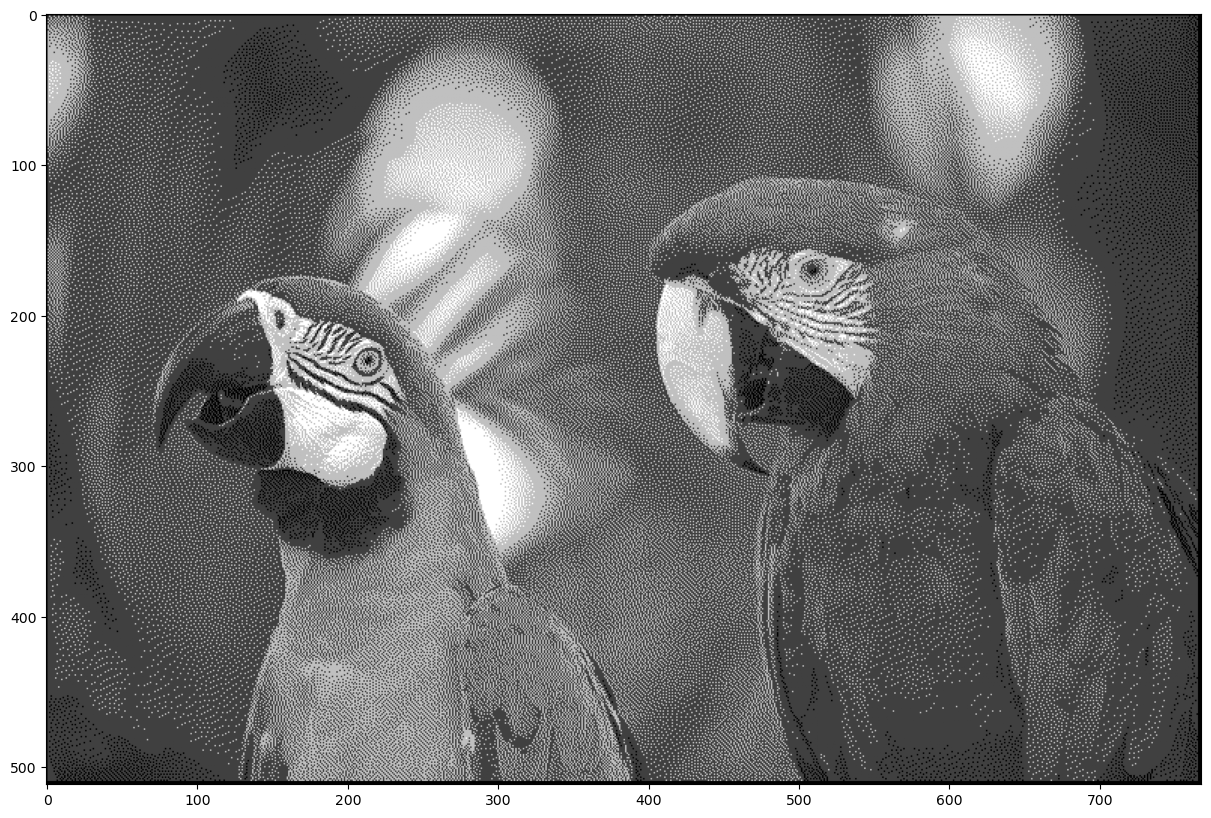

In [198]:


dithering = get_dithered_image(img, colors) 
plt.imshow(dithering)


(<Axes: >, <matplotlib.image.AxesImage at 0x19645d31f50>)

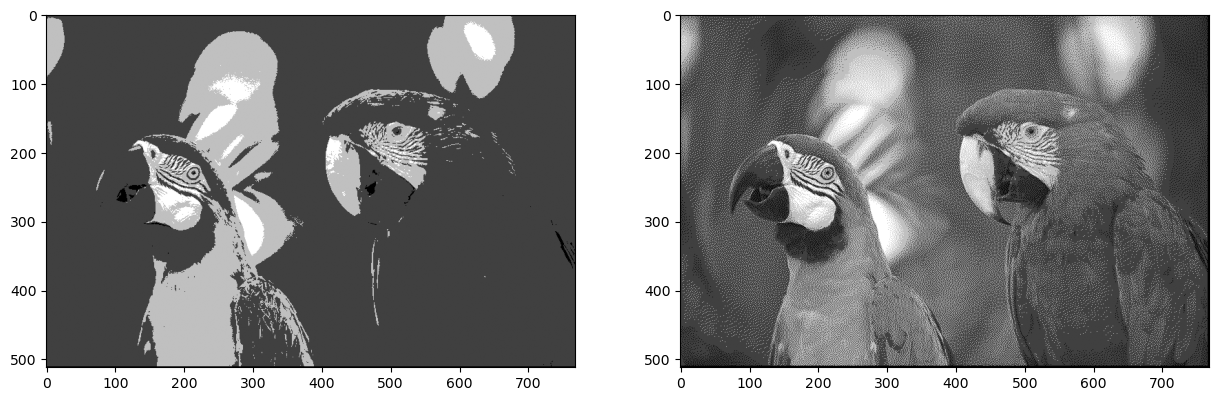

In [199]:
# Show quantized image (don't forget to cast back to uint8)
plt.subplot(121), plt.imshow(quantized)   # optimally quantized
plt.subplot(122), plt.imshow(dithering)   # dithering

In [200]:
# Compute average quantization error
mse = np.mean((img - dithering) ** 2)
if mse != 0:
    psnr = 20 * np.log10(1.0 / np.sqrt(mse))
    print("PSNR for dithering = ",psnr)

PSNR for dithering =  12.921776262013818


1. Which image has higher quantization error? Optimally quantized or dithered?
Quantization error is higher for the dithered image (PSNR is lower).

3. Which image looks better to you?
The dithered image definetely looks better for me (as expected ;)

4. Can you repeat the same process using only two colours: black and white? Show me :-)

   sure. Look below

(<Axes: >, <matplotlib.image.AxesImage at 0x196454f1b10>)

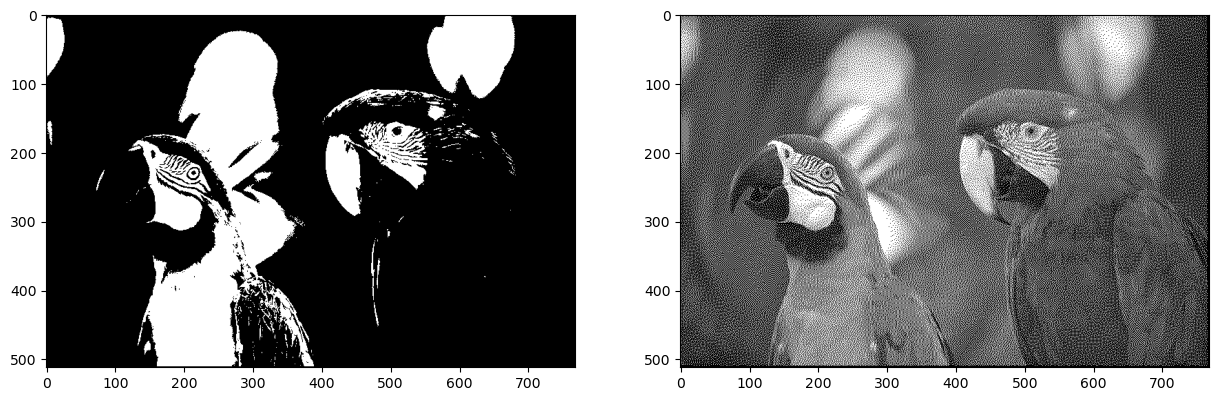

In [201]:
##### Black, dark gray, light gray, white
colors_2 = np.array([[0, 0, 0],
                    [255, 255, 255]])

colors = colors_2/255
quantized = get_quantized_image(img, colors)
dithering = get_dithered_image(img, colors) 
# Show quantized image (don't forget to cast back to uint8)
plt.subplot(121), plt.imshow(quantized)   # optimally quantized
plt.subplot(122), plt.imshow(dithering)   # dithering

(<Axes: >, <matplotlib.image.AxesImage at 0x1964559c9d0>)

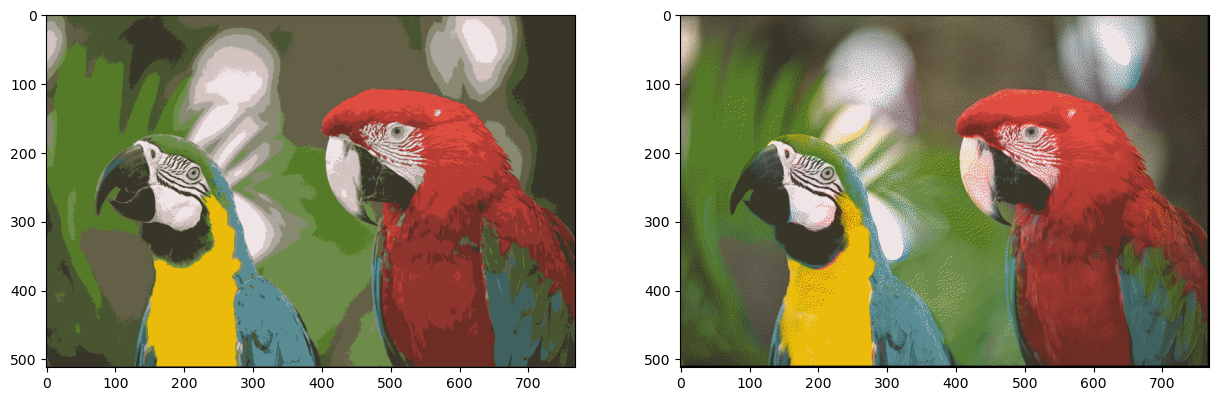

In [202]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=16).fit(np.reshape(img, (-1, 3)))
colors = kmeans.cluster_centers_

quantized = get_quantized_image(img, colors)
dithering = get_dithered_image(img, colors) 
# Show quantized image (don't forget to cast back to uint8)
plt.subplot(121), plt.imshow(quantized)   # optimally quantized
plt.subplot(122), plt.imshow(dithering)   # dithering

Apply FS dithering the same way you did before.

1. How does the result look like to you?
   Definetely, it's more colorful ;) The quantized image has a lot of artefacts. The dithered image looks better for my eyes eventhough it's a litte bit noisy.
   
2. What happens if we use 32 colours?
   The quality of both images became better. 
   
3. And what happens if we use 256 colours?

  Both images looks almost the same as the original

(<Axes: >, <matplotlib.image.AxesImage at 0x1964587f150>)

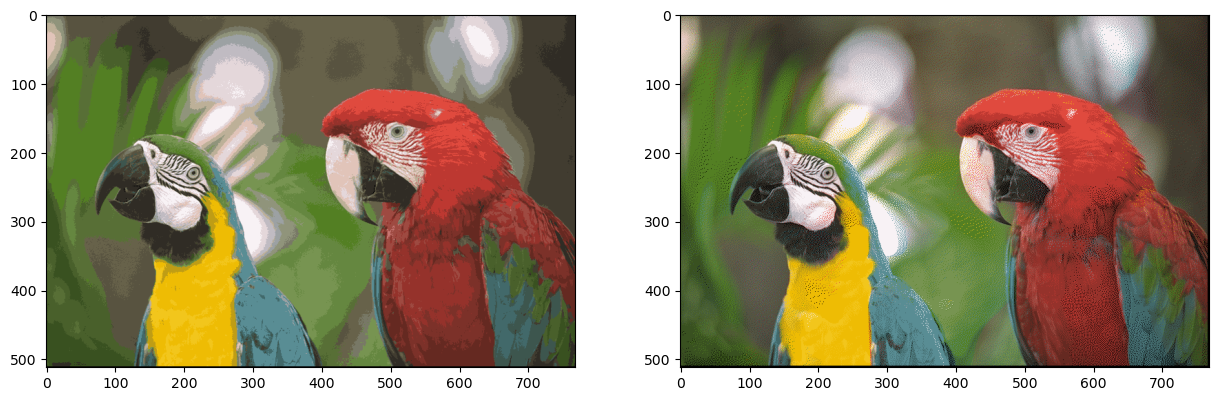

In [203]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=32).fit(np.reshape(img, (-1, 3)))
colors = kmeans.cluster_centers_

quantized = get_quantized_image(img, colors)
dithering = get_dithered_image(img, colors) 
# Show quantized image (don't forget to cast back to uint8)
plt.subplot(121), plt.imshow(quantized)   # optimally quantized
plt.subplot(122), plt.imshow(dithering)   # dithering

(<Axes: >, <matplotlib.image.AxesImage at 0x196458bc9d0>)

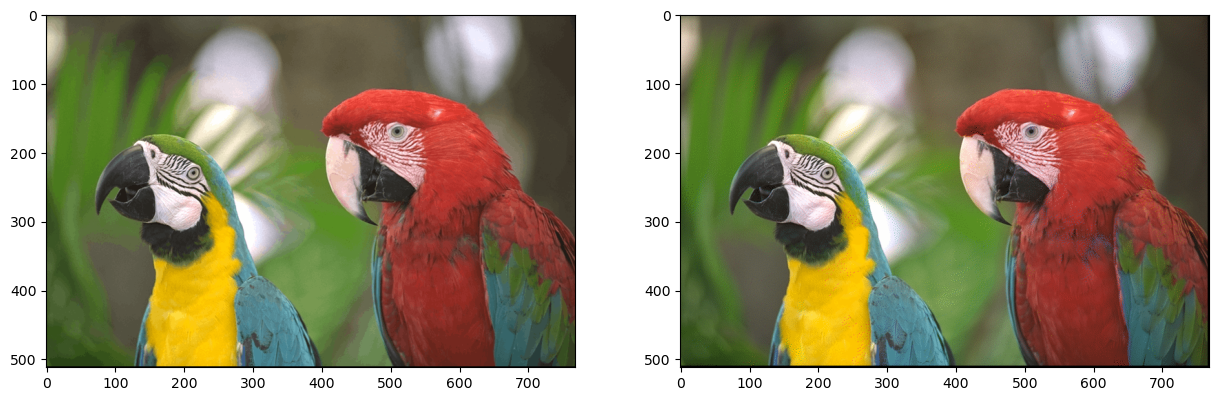

In [204]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=256).fit(np.reshape(img, (-1, 3)))
colors = kmeans.cluster_centers_

quantized = get_quantized_image(img, colors)
dithering = get_dithered_image(img, colors) 
# Show quantized image (don't forget to cast back to uint8)
plt.subplot(121), plt.imshow(quantized)   # optimally quantized
plt.subplot(122), plt.imshow(dithering)   # dithering